In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the Data



In [2]:
# Left foot sensor
left_df = pd.read_csv("left.csv")
# Right foot sensor
right_df = pd.read_csv("right.csv")

In [3]:
left_df.head()

,timestamp,step,stride_pace,step_rate,stride_length,contact_time,flight_ratio,power,shock,impact_gs,...,yaw_excursion_fs_mp,yaw_excursion_mp_to,yaw_excursion_swing,stance_velocity_max_fs_mp,stance_velocity_max_mp_to,temperature,step_length,pronation_excursion_mp_to,stance_excursion_fs_mp,stance_excursion_mp_to
0,33001.0,1,1.3705,120.0000,1.5702,642,0.0,159,3.1487,1.6016,...,2.1719,18.0781,18.5781,343.7500,546.9360,NaN,0.7851,-25.0625,10.5938,81.7969
1,34001.0,2,1.3667,119.4030,1.5702,636,0.0,158,3.5625,1.1172,...,5.8438,14.1094,18.0781,422.7905,553.4058,NaN,0.7851,-17.7500,8.8125,76.6094
2,35006.0,3,1.3590,115.8301,1.5702,660,0.0,158,2.6041,1.2344,...,3.9219,11.9531,14.9063,315.3076,505.0659,NaN,0.7851,-24.6875,7.4531,77.7188
3,36042.0,4,1.3475,115.4957,1.5702,669,0.0,157,2.9380,1.2305,...,2.3906,16.9531,17.6563,325.7446,539.4897,NaN,0.7851,-28.5938,3.2969,80.7656
4,37081.0,5,1.3513,120.4819,1.5702,636,0.0,157,2.4447,1.5547,...,3.2656,14.9375,17.0625,337.8906,535.5225,NaN,0.7851,-21.6094,10.6875,76.7969


In [4]:
right_df.head()

,timestamp,step,stride_pace,step_rate,stride_length,contact_time,flight_ratio,power,shock,impact_gs,...,yaw_excursion_fs_mp,yaw_excursion_mp_to,yaw_excursion_swing,stance_velocity_max_fs_mp,stance_velocity_max_mp_to,temperature,step_length,pronation_excursion_mp_to,stance_excursion_fs_mp,stance_excursion_mp_to
0,0.0,1,1.4025,117.8782,1.625,640,0.0,203,1.3974,1.2188,...,0.1563,3.3438,2.5781,359.5581,535.4614,NaN,0.8125,-14.3750,13.8438,72.9219
1,1018.0,2,1.4065,120.9677,1.625,622,0.0,203,3.0685,1.6641,...,0.2813,2.1875,5.8125,371.7041,572.3267,NaN,0.8125,-12.1875,19.8594,67.5156
2,2010.0,3,1.3985,116.9591,1.625,656,0.0,203,3.2213,2.1328,...,4.0469,3.0313,9.8750,372.8638,548.5840,NaN,0.8125,-9.5313,12.1406,76.5313
3,3036.0,4,1.3946,119.0476,1.625,642,0.0,202,2.8132,1.4766,...,0.0781,3.7969,7.5469,371.0938,540.4053,NaN,0.8125,-12.7813,12.8281,77.0313
4,4044.0,5,1.3946,117.4168,1.625,654,0.0,202,3.1708,2.1484,...,2.2188,3.3281,7.0469,338.8062,544.0674,NaN,0.8125,-7.6875,12.7188,76.2656


## Goal
Our goal is to gather aggregated data for the multivariate gait deviation graph shown in the Figma dashboard. We want to do this for the data from both the left and right sensors.

### Key Measurements/Variables
- Cadence/Pace
- Strike Angle
- Step Length
- Flight Phase
- Stride Length
- Contact Phase
- Footstrike Type (Not that important because it is categorical)
- Gait Velocity

## Data Visualization
Before we aggregate the data - we want to take a look at the raw data with respect to the timestamps.

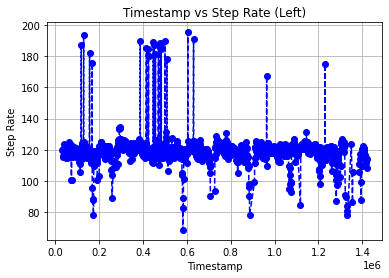

In [13]:
plt.title("Timestamp vs Step Rate (Left)")

plt.plot(left_df["timestamp"], left_df["step_rate"], "bo--")
plt.xlabel("Timestamp")
plt.ylabel("Step Rate")
plt.grid()

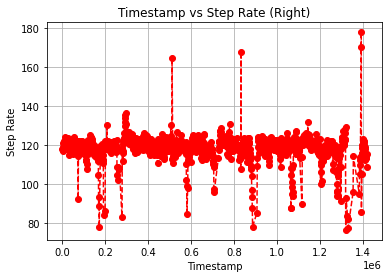

In [9]:
plt.title("Timestamp vs Step Rate (Right)")

plt.plot(right_df["timestamp"], right_df["step_rate"], "ro--")
plt.xlabel("Timestamp")
plt.ylabel("Step Rate")
plt.grid()

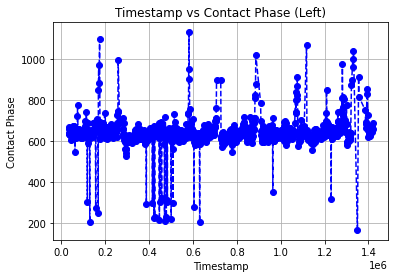

In [10]:
plt.title("Timestamp vs Contact Phase (Left)")

plt.plot(left_df["timestamp"], left_df["contact_time"], "bo--")
plt.xlabel("Timestamp")
plt.ylabel("Contact Phase")
plt.grid()

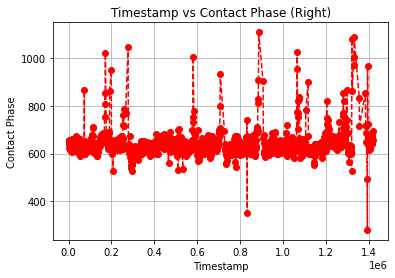

In [12]:
plt.title("Timestamp vs Contact Phase (Right)")

plt.plot(right_df["timestamp"], right_df["contact_time"], "ro--")
plt.xlabel("Timestamp")
plt.ylabel("Contact Phase")
plt.grid()

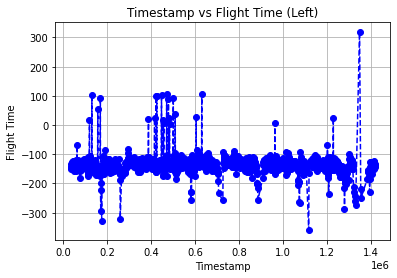

In [17]:
plt.title("Timestamp vs Flight Time (Left)")

plt.plot(left_df["timestamp"], left_df["flight_time"], "bo--")
plt.xlabel("Timestamp")
plt.ylabel("Flight Time")
plt.grid()

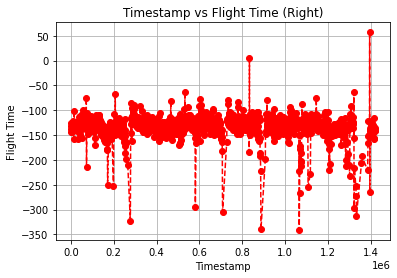

In [18]:
plt.title("Timestamp vs Flight Time (Right)")

plt.plot(right_df["timestamp"], right_df["flight_time"], "ro--")
plt.xlabel("Timestamp")
plt.ylabel("Flight Time")
plt.grid()

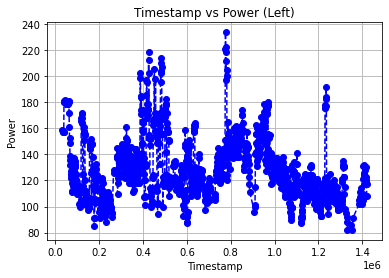

In [19]:
plt.title("Timestamp vs Power (Left)")

plt.plot(left_df["timestamp"], left_df["power"], "bo--")
plt.xlabel("Timestamp")
plt.ylabel("Power")
plt.grid()

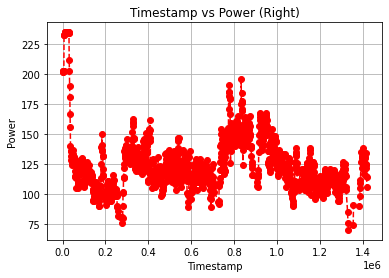

In [20]:
plt.title("Timestamp vs Power (Right)")

plt.plot(right_df["timestamp"], right_df["power"], "ro--")
plt.xlabel("Timestamp")
plt.ylabel("Power")
plt.grid()

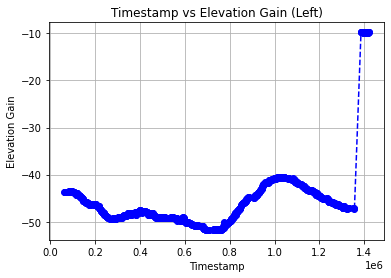

In [21]:
plt.title("Timestamp vs Elevation Gain (Left)")

plt.plot(left_df["timestamp"], left_df["elevation_gain"], "bo--")
plt.xlabel("Timestamp")
plt.ylabel("Elevation Gain")
plt.grid()

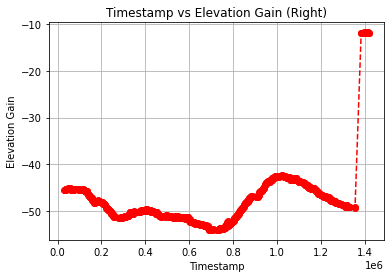

In [23]:
plt.title("Timestamp vs Elevation Gain (Right)")

plt.plot(right_df["timestamp"], right_df["elevation_gain"], "ro--")
plt.xlabel("Timestamp")
plt.ylabel("Elevation Gain")
plt.grid()

### Thoughts
The data seems to be relatively consistent for both feet. There are typically a few outliers, but most of the values seem to normalize around a certain value.